<a href="https://colab.research.google.com/github/kaarthikalagappan/ai_course_projects/blob/master/HW3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Some code snippets adapted from Dr. Wocjan's notebook for Logistic Regression and IMDB classification
# Reused code from my problem 1

###Function to generate random data

In [0]:
def get_random_data(w, b, mu, sigma, m):
    data = np.zeros(shape=(m, 2))
    labels = np.zeros(shape=(m, 1))
    x_1_arr = np.zeros(shape=(m, 1))
    x_2_arr = np.zeros(shape=(m, 1))
    for i in range(m):
        rnd = random.random()
        if rnd < 0.5:
            c = 0
        else:
            c = 1
        x_1 = np.random.uniform(0, 1)
        n = np.random.normal(mu, sigma)
        x_2 = (w * x_1) + b + ((-1)**c * n)
        data[i] = [x_1, x_2]
        labels[i] = c
        x_1_arr[i] = x_1
        x_2_arr[i] = x_2
    return data, labels, x_1_arr, x_2_arr

###Function to display the randomly generate data and true line from that

In [0]:
def display_random_data(data, labels):
    x, y = data.T
    for i in range(training_size):
        if labels[i] == 1:
            color = "r."
        else:
            color = "b."
        plt.plot(x[i], y[i], color)
    y_2 = 2 * (x) + 3
    plt.plot(x[:training_size], y_2[:training_size], "y-", label="true line")

###Generating random data and splitting 80% of them into training data and the rest 20% into testing data

In [0]:
data, labels, x_1, x_2 = get_random_data(2, 3, .29, .15, 10000)

training_size = int(labels.size * .8)
test_size = labels.size - training_size
test_indicies = labels.size - test_size

training_data = data[:training_size]
training_labels = labels[:training_size]

test_data = data[test_indicies:]
test_labels = labels[test_indicies:]


###Training the model using binary crossentropy

Epoch 1/25
800/800 [==============================] - 1s 1ms/step - loss: 0.7336 - accuracy: 0.4944 - val_loss: 0.7040 - val_accuracy: 0.4975
Epoch 2/25
800/800 [==============================] - 1s 1ms/step - loss: 0.7027 - accuracy: 0.4972 - val_loss: 0.6957 - val_accuracy: 0.5145
Epoch 3/25
800/800 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5166 - val_loss: 0.6878 - val_accuracy: 0.5285
Epoch 4/25
800/800 [==============================] - 1s 1ms/step - loss: 0.6865 - accuracy: 0.5375 - val_loss: 0.6804 - val_accuracy: 0.5530
Epoch 5/25
800/800 [==============================] - 1s 1ms/step - loss: 0.6789 - accuracy: 0.5615 - val_loss: 0.6732 - val_accuracy: 0.5845
Epoch 6/25
800/800 [==============================] - 1s 1ms/step - loss: 0.6716 - accuracy: 0.5980 - val_loss: 0.6664 - val_accuracy: 0.6225
Epoch 7/25
800/800 [==============================] - 1s 1ms/step - loss: 0.6646 - accuracy: 0.6421 - val_loss: 0.6600 - val_accuracy: 0.6880
Epoch 

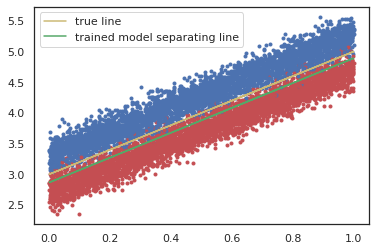

In [150]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,
                                activation='sigmoid',
                                input_dim=training_data.shape[1]))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

history = model.fit(training_data, 
                      training_labels, 
                      epochs=25, 
                      batch_size=10, 
                      validation_data=(test_data, test_labels))

#code to train the model without validation data (test data)
# history = model.fit(training_data, 
#                       training_labels, 
#                       epochs=25, 
#                       batch_size=10)

# print(str(model.get_weights()))

w1 = model.layers[0].get_weights()[0][0]
w2 = model.layers[0].get_weights()[0][1]
bias = model.layers[0].get_weights()[1]

w1x1 = x_1[:training_size]*w1
if w2 != 0:
    x_2_real = (-(np.add(w1x1, bias))) / w2
else:
    x_2_real = (-(np.add(w1x1, bias)))

display_random_data(data, labels)
plt.plot(x_1[:training_size], x_2_real, "g-", label="trained model separating line")
plt.legend()
plt.show()


###Heat Map

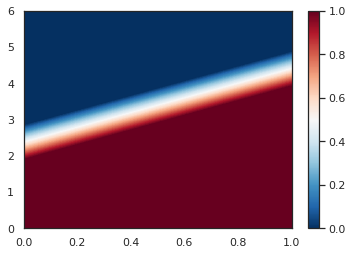

In [151]:
#an answer from a stackoverflow question helped me code up the heatmap
y, x = np.meshgrid(np.linspace(0, 6, 1000), np.linspace(0, 1, 1000))

z = (x*w1) + (y*w2) + bias

z_min, z_max = 0, 1

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu_r', vmin=z_min, vmax=z_max)

ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

###Evaluating Accuracy of the trained mode

In [152]:
loss_value_testing, accuracy_rate_testing = model.evaluate(test_data, test_labels)

print('Loss value with test data: {0:.4f}, accuracy rate with test data: {1:.2f}%'.format(loss_value_testing, accuracy_rate_testing*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.9325
Loss value with test data: 0.5586, accuracy rate with test data: 93.25%


###How to obtain separating line from trained model
You obtain the weights, $w_1$ and $w_2$, and the bias term from the sigmoid activation layer using the get_weights() function.

Given the function $o(z) = w_1x_1 + w_2x_2 + b$, where $o(z)$ is the sigmoid function, we solve for the equation when the sigmoid function is 0.

With the equation $w_1x_1 + w_2x_2 + b = 0$, we solve for $x_2$.

We get $x_2 = -(w_1x_1 + b) / w_2$, where our $x_2$ would be plotted against the original $x_1$ to obtain the separating line.